## **Task-1 Prediction using Supervised ML**

This task is part of the internship with The Sparks Foundation. I have been tasked to predict the percentage of marks scored by the students based on the number of study hours.

### Author: Disha Dutta


### **Step 1 - Importing all the required libraries**


In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error

### **Step 2 - Reading data from the remote link**

In [2]:
url = "http://bit.ly/w-data"
student_data = pd.read_csv(url)
print("Data is imported successfully")
student_data

Data is imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
# Printing first 10 records
student_data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
# Printing last 10 records
student_data.tail(10)

,Hours,Scores
15,8.9,95
16,2.5,30
17,1.9,24
18,6.1,67
19,7.4,69
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
# The shape of dataset 
student_data.shape

(25, 2)

In [7]:
# info of student data
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
# Describing the student data
student_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### **Step 3 - Visualisation of the data**

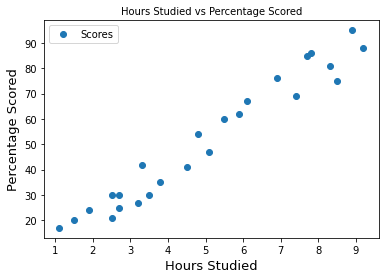

In [9]:
student_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours Studied vs Percentage Scored', fontsize=10)  
plt.xlabel('Hours Studied', fontsize=13)  
plt.ylabel('Percentage Scored', fontsize=13)  
plt.show()

Thus, from the data visualisation graph we can indicate a positive linear relation between hours studied and percentage scored

### **Step 4 - Preparing the data**

In [10]:
X = student_data.iloc[:, :-1].values  
y = student_data.iloc[:, 1].values  

In [25]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [26]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

### **Step 5 - Splitting data into train set and test set**

In [11]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [12]:
print("X train.shape =", X_train.shape)
print("Y train.shape =", y_train.shape)
print("X test.shape  =", X_test.shape)
print("Y test.shape  =", y_test.shape)

X train.shape = (20, 1)
Y train.shape = (20,)
X test.shape  = (5, 1)
Y test.shape  = (5,)


### **Step 6 - Model Training**

Splitting the student data into training and testing sets, and then train the algorithm. 

In [13]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training the model is complete.")

Training the model is complete.


Plotting line of regression

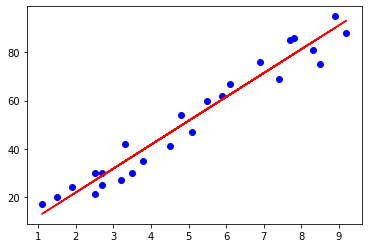

In [15]:
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y, color='blue')
plt.plot(X, line, color='red', );
plt.show()

### **Step 7 - Making Predictions**

As we have trained our algorithm. So, we will make some predictions now

In [16]:
# Testing data - In Hours
print(X_test)
# Prediction of the scores
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


### **Step 8 - Comparing Actual Result and Predicted Result**

In [17]:
dataframe = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
dataframe 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [18]:
#Estimating training and test score
print("Training Score:",regressor.score(X_train,y_train))
print("Test Score:",regressor.score(X_test,y_test))

Training Score: 0.9515510725211553
Test Score: 0.9454906892105354


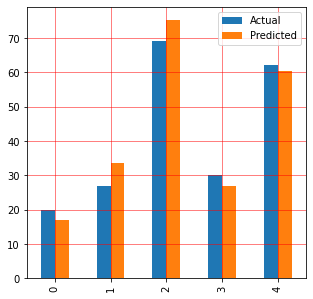

In [19]:
# Plotting the Bar graph to depict the difference between the actual and predicted value

dataframe.plot(kind='bar',figsize=(5,5))
plt.grid(which='major', linewidth='0.5', color='red')
plt.grid(which='minor', linewidth='0.5', color='blue')
plt.show()

### **Step 9 - Accuracy of the Model**

Here, we will check the accuracy of the model

In [20]:
metrics.r2_score(y_test,y_pred)

0.9454906892105354

### **Step 10 - Predicting Error**

Evaluating the performance of the algorithm

In [21]:
MSE = metrics.mean_squared_error(y_test,y_pred)
Root_E = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
Abs_E = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
R2 = metrics.r2_score(y_test, y_pred)
print("Mean Squared Error = ",MSE)
print("Root Mean Squared Error = ",Root_E)
print("Mean Absolute Error = ",Abs_E)
print('R-2:', R2)

Mean Squared Error =  21.598769307217456
Root Mean Squared Error =  4.647447612100373
Mean Absolute Error =  4.647447612100373
R-2: 0.9454906892105354


R-2 gives the score of model fit and in this case we have R-2 = 0.9454906892105354 which is actually a great score for this model.

### **Step 11 - Predicting Score**

Predicting the score using our own model

In [22]:
hours = 9.25
own_pred = regressor.predict([[9.25]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


In [23]:
print("Hence, predicted score for a student studying 9.25 hours per day is {}".format(own_pred[0]))

Hence, predicted score for a student studying 9.25 hours per day is 93.69173248737539


### **Conclusion -**

A student studying 9.25 hours a day is expected to score approximately 93.7 marks.